In [1]:
%matplotlib inline
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
records = pd.read_csv('../../data/cleaned_texts_oct19_2016.tsv', sep='\t')
records = records[records.pub_year > 1599]
records = records[records.pub_year < 1700]

In [3]:
records.replace(
    'el ingenioso hidalgo don qvixote de la mancha,cervantes saavedra, miguel de',
    'el ingenioso hidalgo don quixote de la mancha,cervantes saavedra, miguel de',
    inplace=True
)

/home/davebshow/.virtualenvs/scientific3/lib/python3.4/site-packages/pandas/core/common.py:449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


In [15]:
records.head(1)

,Unnamed: 0,control_number,title,uniform_title,author,publisher,pub_location,pub_year,translation,prev_language,slug,canonical_city,canonical_country,text_slug
156,190,11508275,viage de la serenissima reyna dona maria ana d...,NaN,"mascarenhas, jeronymo",por d. diaz de la carrera,madrid,1650,NaN,NaN,"madrid,spain",madrid,spain,viage de la serenissima reyna dona maria ana d...


In [4]:
len(records)

38256

In [7]:
records[(records.text_slug == 'el ingenioso hidalgo don quixote de la mancha,cervantes saavedra, miguel de')]

,Unnamed: 0,Unnamed: 0.1,control_number,title,uniform_title,author,publisher,pub_location,pub_year,translation,prev_language,slug,canonical_city,canonical_country,text_slug,full_text_slug
145832,146608,221498,740237822,el ingenioso hidalgo don qvixote de la mancha,don quixote,"cervantes saavedra, miguel de","impresso con licencia, en casa de p.p. mey, a ...",valencia,1605,NaN,NaN,"valencia,spain",valencia,spain,"el ingenioso hidalgo don quixote de la mancha,...","el ingenioso hidalgo don qvixote de la mancha,..."
446125,452126,687087,803358718,el ingenioso hidalgo don quixote de la mancha,don quijote de la mancha,"cervantes saavedra, miguel de","por iuan de la cuesta, vendese en casa de fran...",en madrid,1605,NaN,NaN,"madrid,spain",madrid,spain,"el ingenioso hidalgo don quixote de la mancha,...","el ingenioso hidalgo don quixote de la mancha,..."
593552,603628,917451,803360111,el ingenioso hidalgo don quixote de la mancha,don quijote de la mancha,"cervantes saavedra, miguel de",a costa de iusepe ferrer,en valencia,1605,NaN,NaN,"valencia,spain",valencia,spain,"el ingenioso hidalgo don quixote de la mancha,...","el ingenioso hidalgo don quixote de la mancha,..."
777230,793787,1205813,645846612,el ingenioso hidalgo don qvixote de la mancha,don quixote,"cervantes saavedra, miguel de","por iuan de la cuesta, vendese en casa de fran...",madrid,1605,NaN,NaN,"madrid,spain",madrid,spain,"el ingenioso hidalgo don quixote de la mancha,...","el ingenioso hidalgo don qvixote de la mancha,..."
794116,811333,1233122,457393848,el ingenioso hidalgo don quixote de la mancha,NaN,"cervantes saavedra, miguel de",por j. de la cuesta,madrid,1605,NaN,NaN,"madrid,spain",madrid,spain,"el ingenioso hidalgo don quixote de la mancha,...","el ingenioso hidalgo don quixote de la mancha,..."
1123599,1157444,1760115,433117625,el ingenioso hidalgo don quixote de la mancha,don quijote de la mancha,"cervantes saavedra, miguel de","vendese en casa de francisco de robles, librer...",en madrid,1608,NaN,NaN,"madrid,spain",madrid,spain,"el ingenioso hidalgo don quixote de la mancha,...","el ingenioso hidalgo don quixote de la mancha,..."
1262091,1304670,1985455,20117935,el ingenioso hidalgo don quixote de la mancha,don quixote,"cervantes saavedra, miguel de","vendese en casa de f. de robles, librero del r...",en madrid,1608,NaN,NaN,"madrid,spain",madrid,spain,"el ingenioso hidalgo don quixote de la mancha,...","el ingenioso hidalgo don quixote de la mancha,..."
1347815,1396356,2123980,433117644,el ingenioso hidalgo don quixote de la mancha,don quijote de la mancha,"cervantes saavedra, miguel de",a costa de miguel gracian,impresso ... en barcelona,1617,NaN,NaN,"barcelona,spain",barcelona,spain,"el ingenioso hidalgo don quixote de la mancha,...","el ingenioso hidalgo don quixote de la mancha,..."
1381261,1432216,2179194,848609228,el ingenioso hidalgo don quixote de la mancha,don quixote,"cervantes saavedra, miguel de",juan de la cuesta,madrid,1605,NaN,NaN,"madrid,spain",madrid,spain,"el ingenioso hidalgo don quixote de la mancha,...","el ingenioso hidalgo don quixote de la mancha,..."
2009283,2116233,3218468,44861241,el ingenioso hidalgo don quixote de la mancha,don quixote,"cervantes saavedra, miguel de","por ivan de la cuesta, vendese en casa de fran...",en madrid,1608,NaN,NaN,"madrid,spain",madrid,spain,"el ingenioso hidalgo don quixote de la mancha,...","el ingenioso hidalgo don quixote de la mancha,..."


In [5]:
plt.rcParams['figure.figsize'] = (16.0, 8.0)

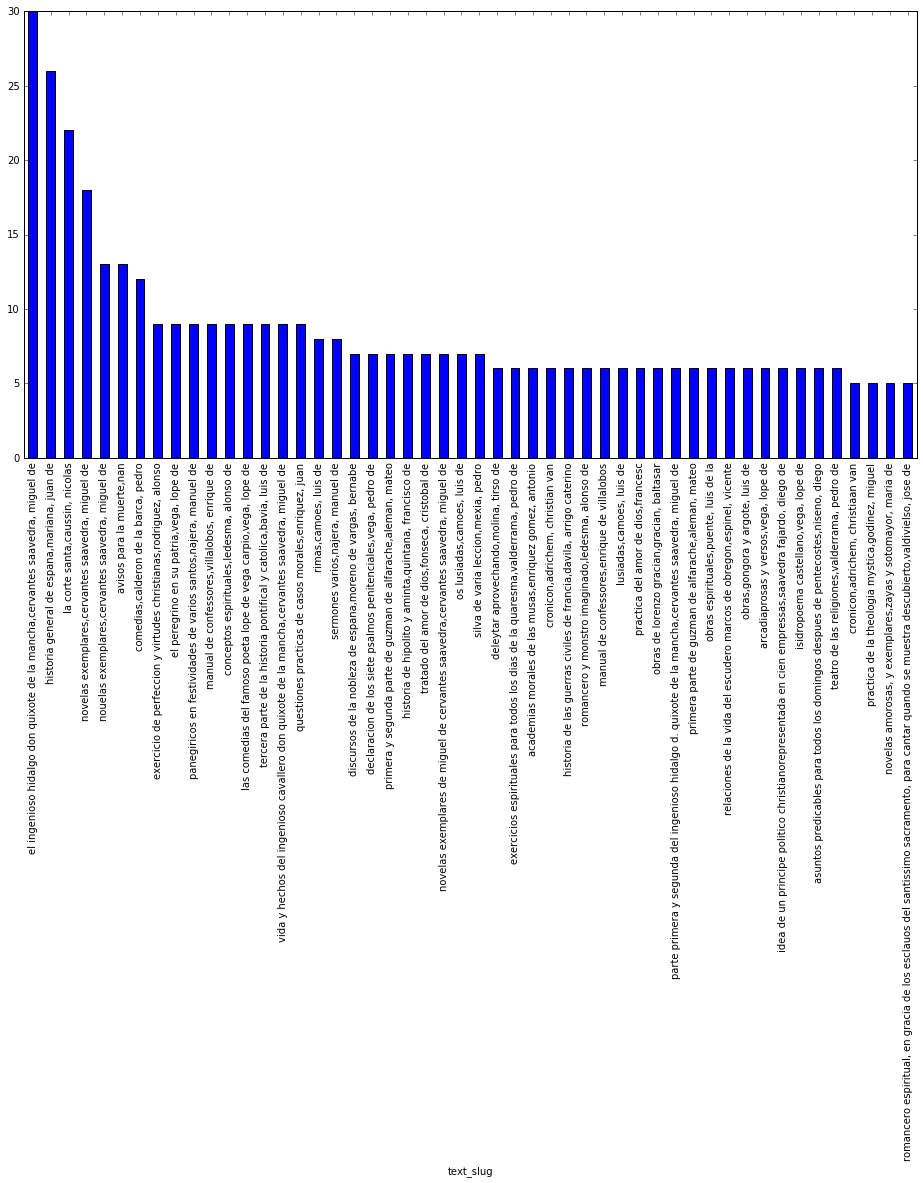

In [6]:
records.groupby('text_slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:50].plot(kind="bar")

In [19]:
len(records.groupby('text_slug').count()['control_number'])

36006

In [20]:
d = {k: len(v) for k, v in records.groupby("text_slug").groups.items()}

def prob_dist(d):
    probs = {}
    for k, v in d.items():
        probs.setdefault(v, 0)
        probs[v] += 1
    return probs


probs = prob_dist(d)

In [21]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

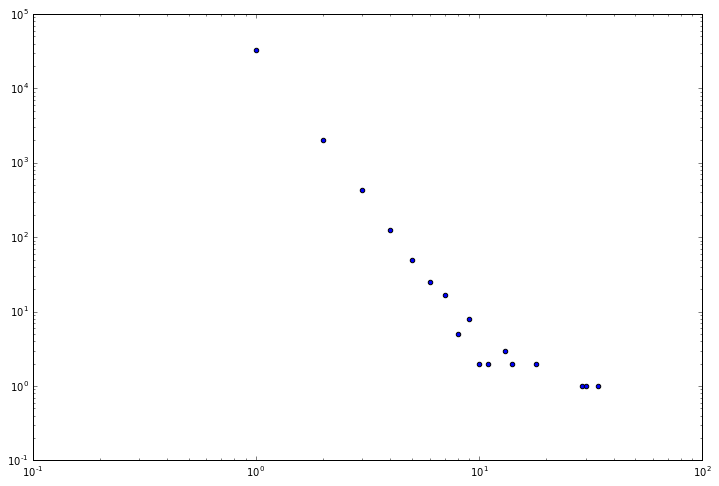

In [22]:
plt.xscale("log")
plt.yscale("log")
plt.scatter(list(probs.keys()), list(probs.values()))

In [23]:
top_slugs = records.groupby('text_slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:50].index

In [24]:
top_slugs

Index(['el ingenioso hidalgo don quixote de la mancha,cervantes saavedra, miguel de',
       'historia general de espana,mariana, juan de',
       'la corte santa,caussin, nicolas',
       'comedias,calderon de la barca, pedro',
       'novelas exemplares,cervantes saavedra, miguel de',
       'avisos para la muerte,nan',
       'vida y hechos del ingenioso cavallero don quixote de la mancha,cervantes saavedra, miguel de',
       'las comedias del famoso poeta lope de vega carpio,vega, lope de',
       'nouelas exemplares,cervantes saavedra, miguel de',
       'relacion historica del ano 1686. tocante al estado, svcessos, y progressos de la liga sagrada contra tvrcos, formada de las vltimas cartas de italia, y el norte,nan',
       'exercicio de perfeccion y virtudes christianas,rodriguez, alonso',
       'el peregrino en su patria,vega, lope de',
       'tercera parte de la historia pontifical y catolica,bavia, luis de',
       'questiones practicas de casos morales,enriquez, juan',
 

In [17]:
top_producers = records[records.text_slug.isin(top_slugs)]

In [18]:
group_top_producers = top_producers.sort_values('pub_year').groupby(['text_slug', 'pub_year']).count()['control_number']

In [19]:
top_producer_df1 = pd.DataFrame({
    'tratado del amor de dios,fonseca, cristobal de': group_top_producers.ix['tratado del amor de dios,fonseca, cristobal de'],
    'la perfecta casada,leon, luis de': group_top_producers.ix['la perfecta casada,leon, luis de'],
    'breuissima relacion de la destruycion de las indias,casas, bartolome de las': group_top_producers.ix['breuissima relacion de la destruycion de las indias,casas, bartolome de las'],
    'de los nombres de christoen tres libros,leon, luis de': group_top_producers.ix['de los nombres de christoen tres libros,leon, luis de'],
    'vocabulario en lengua castellana y mexicana,molina, alonso de': group_top_producers.ix['vocabulario en lengua castellana y mexicana,molina, alonso de'],
    'orlando furioso,ariosto, lodovico': group_top_producers.ix['orlando furioso,ariosto, lodovico'],
    'arte de la lengua mexicana y castellana,molina, alonso de': group_top_producers.ix['arte de la lengua mexicana y castellana,molina, alonso de'],
    'las siete partidas del sabio rey don alonso el nono,nan': group_top_producers.ix['las siete partidas del sabio rey don alonso el nono,nan'],
    'tragicomedia de calisto y melibea': group_top_producers.ix['tragicomedia de calisto y melibea. enla ql se cotiene de mas de su agradable dulce estilo muchas sentencias filosofales: auisosmuy necessarios a macebos ... nueuamente anadido el tractado de centurio. [with woodcuts.] g.l,nan'],
    'oratorio de religiosos y exercicio de virtuosos,guevara, antonio de': group_top_producers.ix['oratorio de religiosos y exercicio de virtuosos,guevara, antonio de'],
    }).fillna(0)

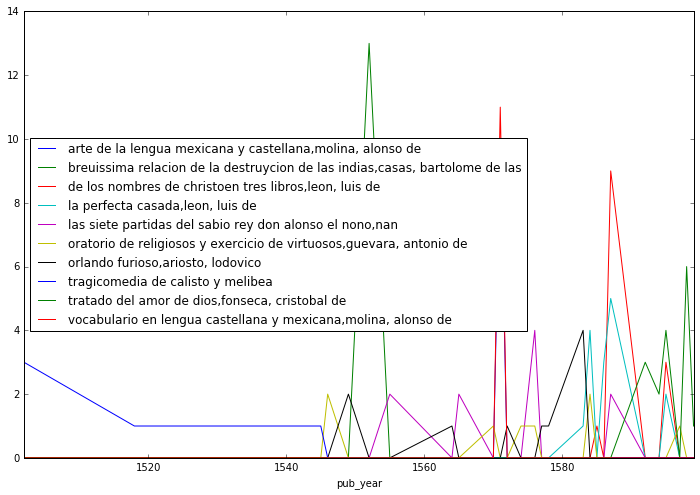

In [20]:
top_producer_df1.plot()

In [ ]:
top_producer_df5 = pd.DataFrame({
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
}).fillna(0)